# Set Up

In [ ]:
##for diff versions of Python
from __future__ import division, print_function, unicode_literals

##importing data
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

##building models and hyper parameter tuning
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

## Learning Curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

## Fitting Graph
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

## ROC Curve
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


# Import Data

In [ ]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# EDA

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
print(total)

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default.payment.next.month    0
dtype: int64


In [ ]:
## skewness
skew_value = df.skew(axis=0)
list_skew_value = list(skew_value)
c = 0
for s in list_skew_value:
  if s > 0.8:
    c += 1
print('Number of columns with skewness > 0.8: '+ str(c))

Number of columns with skewness > 0.8: 19


## distributions

In [ ]:
df1 = df.iloc[:, 1:]
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
# Distribution
fig = plt.figure(figsize=(240, 90))
ax = fig.gca()
fig_1 = df1.hist(ax=ax, layout=(3,8), xlabelsize=35, ylabelsize=35, bins=50)
[x.title.set_size(40) for x in fig_1.ravel()]
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


## closer inspections

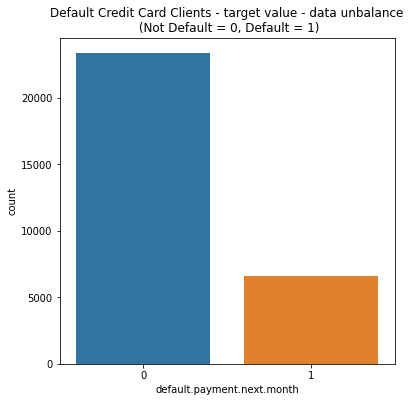

In [ ]:
temp = df["default.payment.next.month"].value_counts()
df_1 = pd.DataFrame({'default.payment.next.month': temp.index,'count': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Not Default = 0, Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="count", data=df_1)
locs, labels = plt.xticks()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

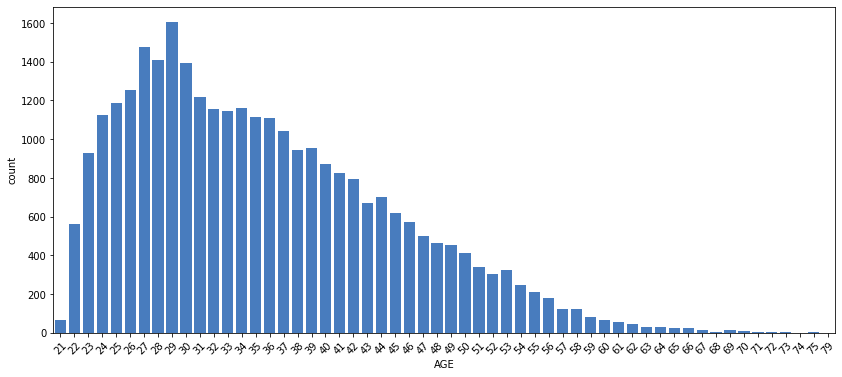

In [ ]:
a4_dims = (14, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df['AGE'],ax=ax, color="#357AD1")
plt.xticks(rotation = 45)

NOTE: Count of defaults vs. Age is normally distributed w/ a right skew

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

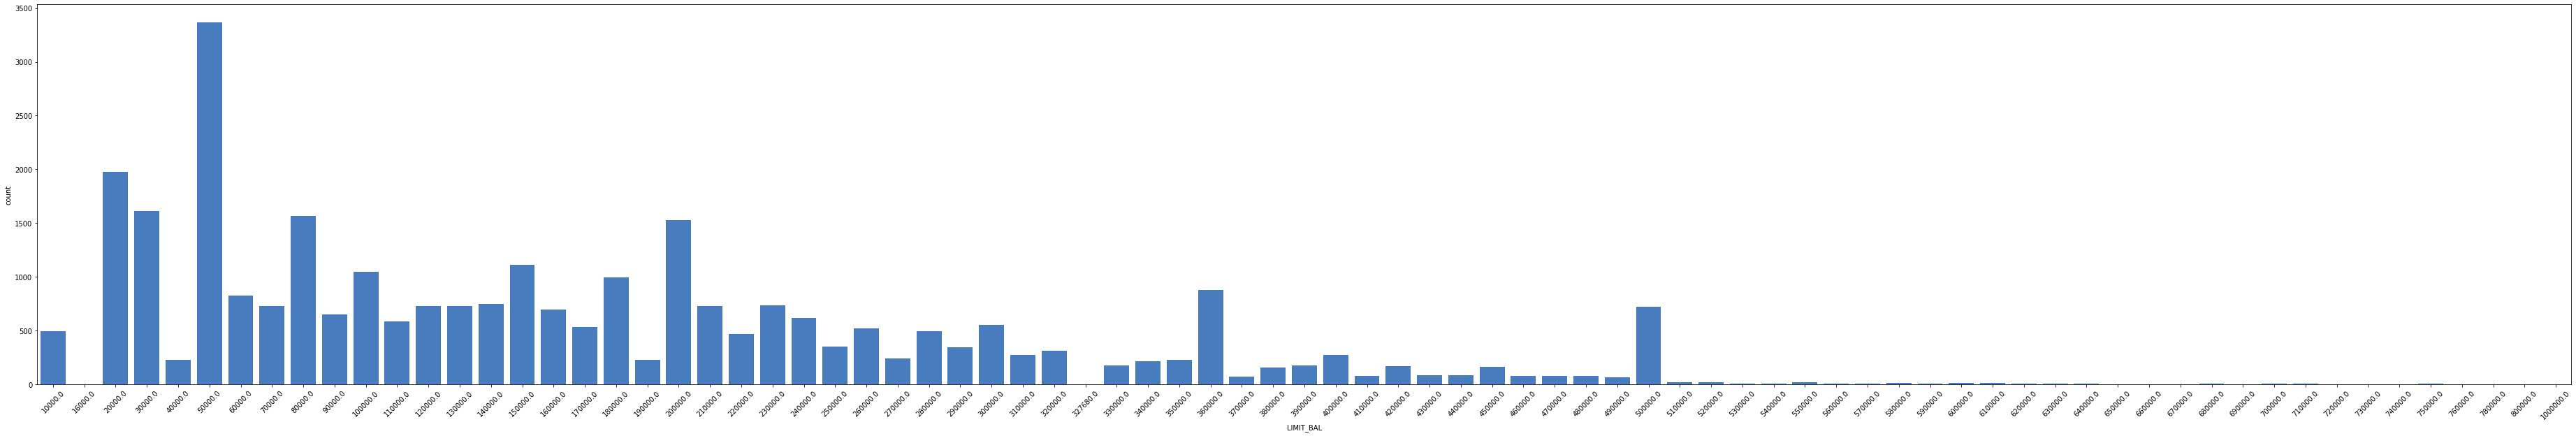

In [ ]:
a5_dims = (65, 10)
fig, ax = plt.subplots(figsize=a5_dims)
sns.countplot(df['LIMIT_BAL'],ax=ax, color="#357AD1")
plt.xticks(rotation = 45)

In [ ]:
df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

In [ ]:
list(df)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [ ]:
df['SEX'].unique()
df['EDUCATION'].unique()
df['PAY_5'].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6])

## Corr Matrix

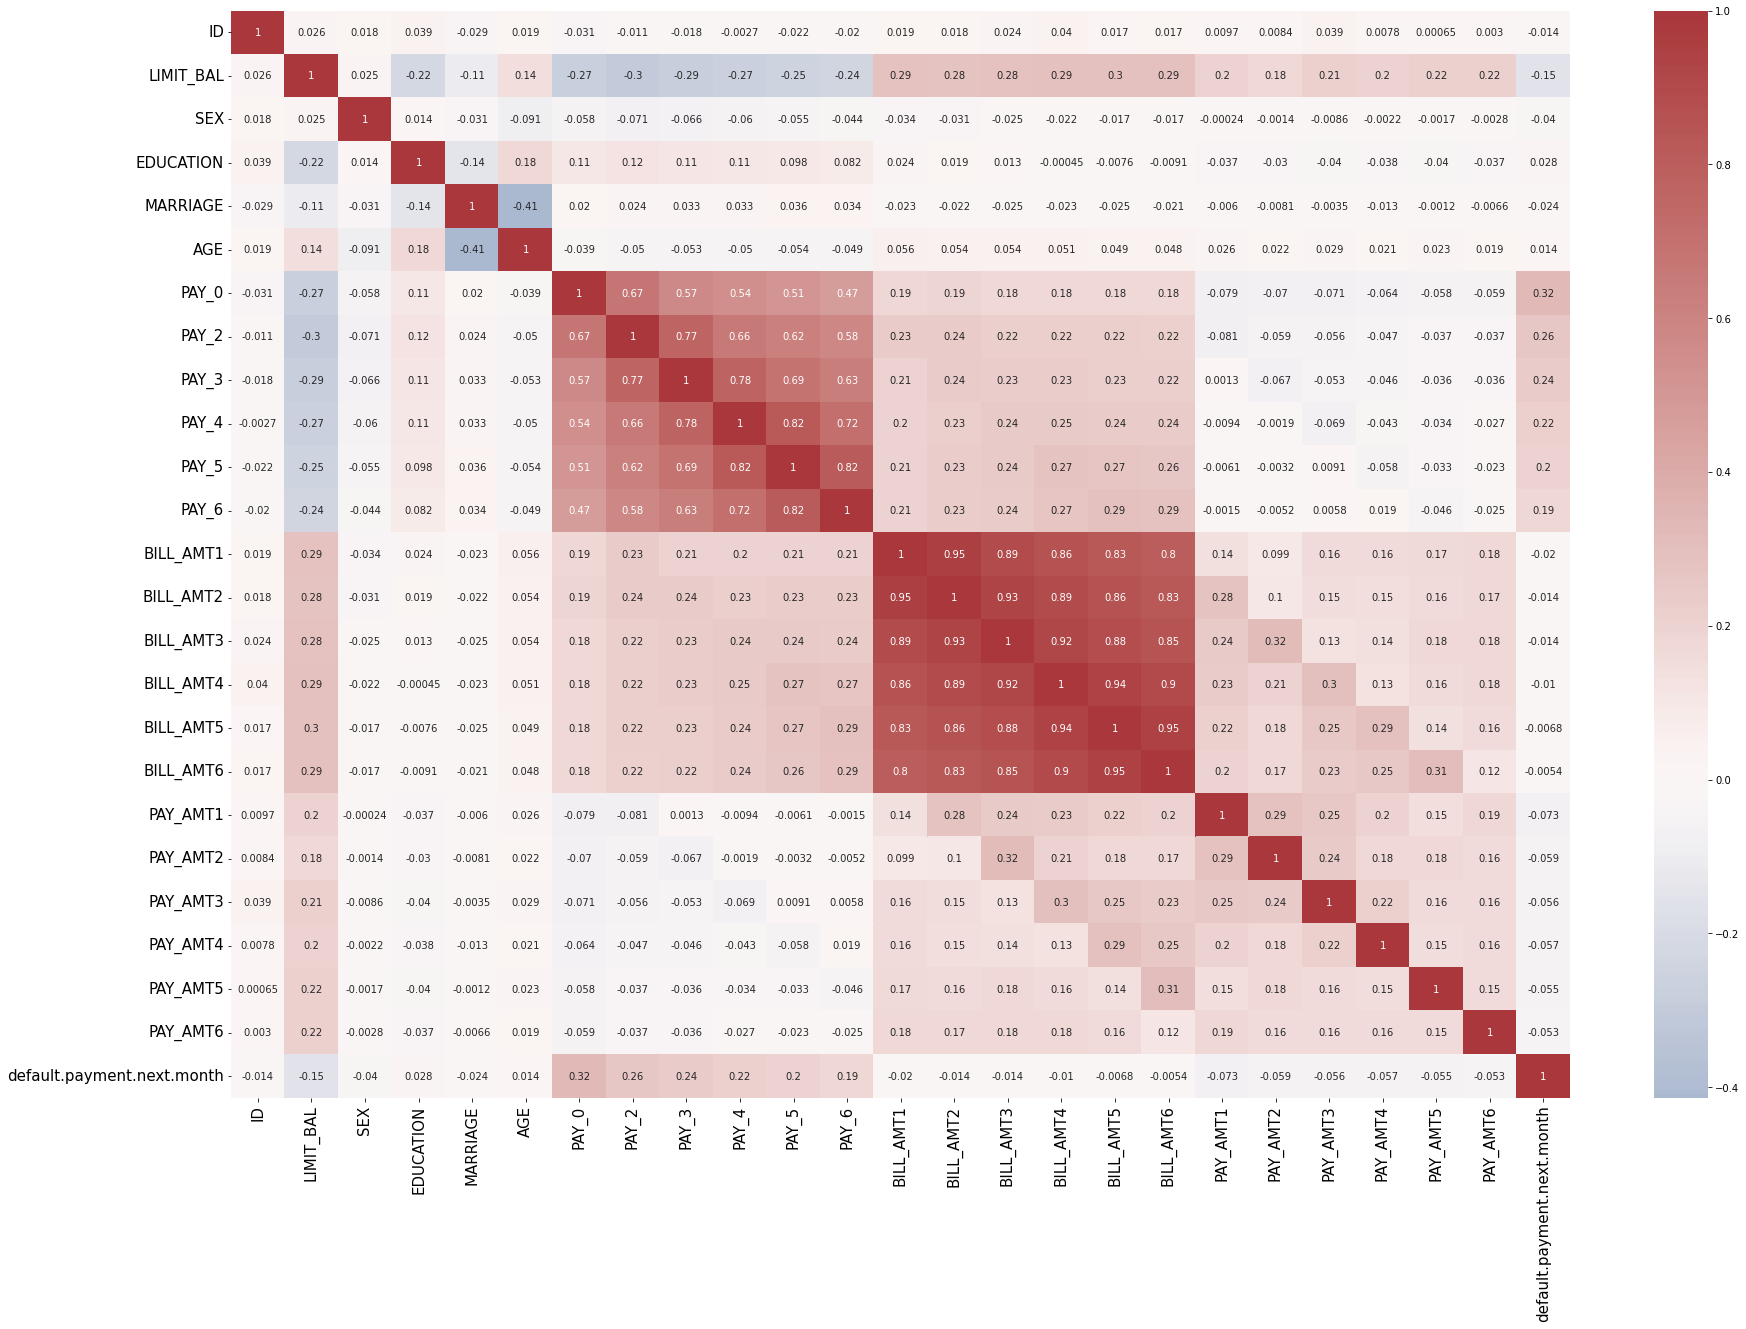

In [ ]:
from typing import ChainMap


plt.figure(figsize = (30,20))
plt.xticks(size = 15)
plt.yticks(size = 15)
sns.heatmap(df.corr(), center= 0.0, annot = True, cmap="vlag")
plt.show()

# Oversampling

In [ ]:
X = df.loc[:, ~df.columns.isin(['ID','default.payment.next.month'])]
y = df['default.payment.next.month']

In [ ]:
#oversampling all
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('Original dataset shape %s' % Counter(y))

# Documentation https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
ros = RandomOverSampler(random_state=42) # default sampling strategy: resample all classes but the majority class
X_oversampled, y_oversampled = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_oversampled))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({1: 23364, 0: 23364})


In [ ]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42,
                        sampling_strategy=0.7)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_oversampled))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({0: 23364, 1: 16354})


# Feture selection (no use, reduced the performance of LR)

## 1. DT model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_oversampled,y_oversampled)

scores = cross_val_score(dt, X_oversampled, y_oversampled, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.85 (+/- 0.08)


In [ ]:
from sklearn.feature_selection import SelectFromModel
print("Before feature selection: ", X.shape)

model = SelectFromModel(dt,prefit=True)
X1 = model.transform(X_oversampled)
print("After feature selection: ", X1.shape)

Before feature selection:  (30000, 23)
After feature selection:  (39718, 11)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1,y_oversampled)

scores = cross_val_score(dt, X1, y_oversampled, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.85 (+/- 0.08)


## 2. KNN model

In [ ]:
sc = StandardScaler()
sc.fit(X_oversampled)

knn = KNeighborsClassifier(p=2, metric='minkowski')

scores = cross_val_score(knn, X_oversampled, y_oversampled, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.65 (+/- 0.07)


## 3. LR model

In [ ]:
from warnings import simplefilter

#To ignore the convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

lr = LogisticRegression(random_state=42, solver='lbfgs')
lr.fit(X_oversampled, y_oversampled)

scores = cross_val_score(lr, X_oversampled, y_oversampled, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Slope: %.3f', lr.coef_)                       # estimated coefficients for the linear regression model

Performance: 0.11 (+/- 0.04)
Slope: %.3f [[-2.23604762e-06  2.82203623e-07  5.78879306e-07  2.19152563e-07
   1.53454344e-05  3.93016268e-06  3.07283913e-06  2.65679911e-06
   2.34865074e-06  2.09518011e-06  1.91371082e-06 -5.21082152e-06
   1.94142896e-06  2.61687269e-06  1.46278485e-06  3.49638825e-06
   2.66119330e-08 -1.95831832e-05 -1.62009401e-05 -5.44568747e-06
  -9.07340953e-06 -1.72470972e-06 -1.54151690e-06]]


In [ ]:
from sklearn.feature_selection import SelectFromModel
print(X.shape)

model = SelectFromModel(lr,prefit=True)
X2 = model.transform(X_oversampled)
print(X2.shape)

(30000, 23)
(39718, 6)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
lr = LogisticRegression(random_state=42, solver='liblinear')
lr.fit(X2, y_oversampled)

scores = cross_val_score(lr, X2, y_oversampled, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Slope: %.3f', lr.coef_)                       # estimated coefficients for the linear regression model

Performance: 0.01 (+/- 0.01)
Slope: %.3f [[-3.31238306e-03  8.53174221e-07 -2.31954486e-05 -1.87991957e-05
  -7.71241763e-06 -1.21809852e-05]]


# Feature Engineering

## FE1 (DT doesn't change, LR imporved by 0.2) -- use this

In [ ]:
# copy the dateset for feature engineering
df1 = df.copy()

# create new features
df1['BILL_AVG'] = df [['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df1.head()

# assign new X and y
X = df1.loc[:, ~df1.columns.isin(['ID','default.payment.next.month']+['BILL_AMT%s' % (i) for i in range(1,7)])]
y = df1['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AVG
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1284.000000
1,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2846.166667
2,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,16942.166667
3,50000.0,2,2,1,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,38555.666667
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,18223.166667


oversampling

In [ ]:
#oversampling all
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#oversampling 70% (we will use this)
print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42,
                        sampling_strategy=0.7) # default sampling strategy: resample all classes but the majority class
                                               # the float number corresponds to the desired ratio of the number of samples
                                               # in the minority class over the number of samples in the majority class after resampling.
X_oversampled_1, y_oversampled_1 = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_oversampled_1))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({0: 23364, 1: 16354})


### 1. DT model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_oversampled_1,y_oversampled_1)

scores = cross_val_score(dt, X_oversampled_1, y_oversampled_1, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.85 (+/- 0.08)


### 2. kNN

In [ ]:
sc = StandardScaler()
sc.fit(X_oversampled_1)

knn = KNeighborsClassifier(p=2, metric='minkowski')

scores = cross_val_score(knn, X_oversampled_1, y_oversampled_1, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.65 (+/- 0.08)


### 3. LR model

In [ ]:
from warnings import simplefilter

#To ignore the convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

lr = LogisticRegression(random_state=42, solver='lbfgs')
lr.fit(X_oversampled_1, y_oversampled_1)

scores = cross_val_score(lr, X_oversampled_1, y_oversampled_1, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Slope: %.3f', lr.coef_)                       # estimated coefficients for the linear regression model

Performance: 0.31 (+/- 0.44)
Slope: %.3f [[-3.15157398e-06  1.08416118e-04  2.14389604e-04  7.61612410e-05
   6.23828693e-03  1.70638352e-03  1.33326411e-03  1.17687062e-03
   1.05449553e-03  9.51997955e-04  8.77779766e-04 -1.96222982e-05
  -1.48084481e-05 -4.72525059e-06 -8.49322657e-06 -3.32617967e-06
  -2.12994610e-06  3.30717735e-06]]


## FE2 (reduced the std of DT, reduced LR by 0.06)

In [ ]:
# copy the dateset for feature engineering
df2 = df.copy()

# create new features
for i in range(1,7):
  df2['PAY_BILL_DIFF%s' % (i)] = df2['PAY_AMT%s' % (i)] - df2['BILL_AMT%s' % (i)]

# assign new X and y
X = df2.loc[:, ~df2.columns.isin(['ID','default.payment.next.month'] + ['BILL_AMT%s' % (i) for i in range(1,7)] + ['PAY_AMT%s' % (i) for i in range(1,7)])]
y = df2['default.payment.next.month']

X.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_BILL_DIFF1,PAY_BILL_DIFF2,PAY_BILL_DIFF3,PAY_BILL_DIFF4,PAY_BILL_DIFF5,PAY_BILL_DIFF6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,-3913.0,-2413.0,-689.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,-2682.0,-725.0,-1682.0,-2272.0,-3455.0,-1261.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,-27721.0,-12527.0,-12559.0,-13331.0,-13948.0,-10549.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,-44990.0,-46214.0,-48091.0,-27214.0,-27890.0,-28547.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,-6617.0,31011.0,-25835.0,-11940.0,-18457.0,-18452.0


oversampling

In [ ]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42,
                        sampling_strategy=0.7)
X_oversampled_2, y_oversampled_2 = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_oversampled_2))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({0: 23364, 1: 16354})


### 1. DT model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_oversampled_2,y_oversampled_2)

scores = cross_val_score(dt, X_oversampled_2, y_oversampled_2, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.85 (+/- 0.07)


### 2. kNN

In [ ]:
sc = StandardScaler()
sc.fit(X_oversampled_2)

knn = KNeighborsClassifier(p=2, metric='minkowski')

scores = cross_val_score(knn, X_oversampled_2, y_oversampled_2, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performance: 0.64 (+/- 0.08)


### 3. LR model

In [ ]:
from warnings import simplefilter

#To ignore the convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

lr = LogisticRegression(random_state=42, solver='lbfgs')
lr.fit(X_oversampled_2, y_oversampled_2)

scores = cross_val_score(lr, X_oversampled_2, y_oversampled_2, cv=10, scoring='f1')

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Slope: %.3f', lr.coef_)                       # estimated coefficients for the linear regression model

Performance: 0.05 (+/- 0.27)
Slope: %.3f [[-3.20337223e-06  1.13517578e-10  3.23185083e-10  7.87759330e-12
   1.21144240e-08  4.31265622e-09  3.39340700e-09  2.90124457e-09
   2.55054968e-09  2.29199453e-09  2.08900690e-09  2.26973563e-07
  -5.85372181e-07  3.90542419e-07 -1.02891118e-06 -7.35546357e-07
  -8.50299144e-07]]


# Model Hypertuning

## 1. Decision Tree

In [ ]:
##Cross Validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)   #inner cv folds
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)   #outter cv folds

In [ ]:
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':np.arange(1, 20, 2).tolist()}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt = gs_dt.fit(X_oversampled_1,y_oversampled_1)
print("\nParameter Tuning for Decision Tree")
print("Non-nested CV f1-score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X_oversampled_1, y=y_oversampled_1, cv=outer_cv)
print("Nested CV f1-score: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


Parameter Tuning for Decision Tree
Non-nested CV f1-score:  0.8273567105467492
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', random_state=42)
Nested CV f1-score:  0.8273567105467492  +/-  0.005502047260793885


## 2. k-NN

In [ ]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(p=2,
                                 metric='minkowski'))
])

#Parameters to optimize:  k for number of nearest neighbors AND type of distance

params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance']
    }

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn = gs_knn.fit(X_oversampled_1,y_oversampled_1)
print("\nParameter Tuning for kNN")
print("Non-nested CV f1-score: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = cross_val_score(gs_knn, X=X_oversampled_1, y=y_oversampled_1, cv=outer_cv)
print("Nested CV f1-score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Parameter Tuning for kNN
Non-nested CV f1-score:  0.8463807913293333
Optimal Parameter:  {'knn__n_neighbors': 21, 'knn__weights': 'distance'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=21, weights='distance'))])


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be 

Nested CV f1-score:  0.8463807913293333  +/-  0.0037094030605078925


## 3. Logistic Regression

In [ ]:
#To ignore the convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='f1',

                  cv=inner_cv)

gs_lr = gs_lr.fit(X_oversampled_1,y_oversampled_1)
print("\nParameter Tuning for Logistic Regression")
print("Non-nested CV f1-score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X_oversampled_1, y=y_oversampled_1, cv=outer_cv)
print("Nested CV f1-score:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


Parameter Tuning for Logistic Regression
Non-nested CV f1-score:  0.5827700196158135
Optimal Parameter:  {'C': 10, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')
Nested CV f1-score: 0.5825343972524777  +/-  0.005265259048076243


# Model Evaluations

## Fitting Graphs




In [ ]:
clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_knn = KNeighborsClassifier(weights='distance')
clf_lr = LogisticRegression(penalty='l1',random_state=42, solver='liblinear')
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)

In [ ]:
# Function for fitting graphs
def plot_fitting_curve(estimator, title, X, y,param_name,param_range,scoring_method, ylim=None, cv=None,
                        n_jobs=1):

    plt.figure()
    plt.grid()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Parameter "+param_name)
    plt.ylabel(scoring_method)

    train_scores, test_scores = validation_curve(estimator=estimator, X=X,y=y,param_name=param_name, param_range=param_range,cv=cv,scoring=scoring_method,n_jobs=4)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training f1-score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(param_range, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation f1-score')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.legend(loc='best')
    plt.tight_layout()
    return plt

### 1. Decision *Tree*

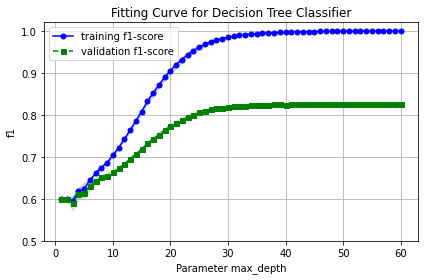

In [ ]:
#decision tree
param_range = [i for i in range(1,61)]
plot_fitting_curve(clf_dt, "Fitting Curve for Decision Tree Classifier", X_oversampled_1, y_oversampled_1,
                   'max_depth',param_range,'f1', ylim=[0.5,1.02], cv=cv, n_jobs=4)
plt.show()

### 2. Fitting Graph (kNN)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


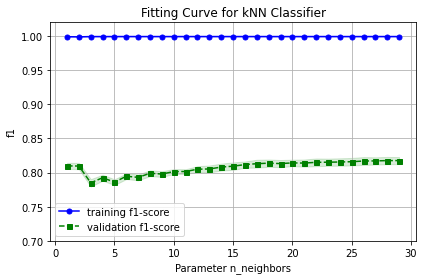

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_range = [i for i in range(1,30)]
plot_fitting_curve(clf_knn, "Fitting Curve for kNN Classifier", X_oversampled_1, y_oversampled_1,
                   'n_neighbors', param_range,'f1', ylim=[0.7,1.02], cv=cv, n_jobs=4)
plt.show()

### 3. Fitting Graph (Logistic Regression)

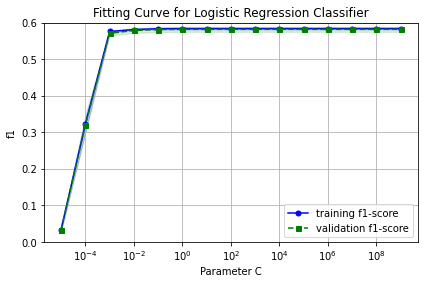

In [ ]:
# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split
# Class for Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

np.random.seed(42)                        # the seed used by the random number generator for np

# Fitting Graph: Logistic Regression Classifier
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
plot_fitting_curve(clf_lr, "Fitting Curve for Logistic Regression Classifier", X_oversampled_1, y_oversampled_1,
                   'C', param_range,'f1', ylim=[0, 0.6], cv=cv, n_jobs=4)
plt.xscale('log')
plt.show()

## ROC

In [ ]:
###################################### Classifier ######################################

X_train, X_test, y_train, y_test = train_test_split(X_oversampled_1,
                                                    y_oversampled_1,
                                                    test_size=0.20,
                                                    random_state=42)

10-fold cross validation:

ROC AUC: 0.97 (+/- 0.03) [kNN]
ROC AUC: 0.87 (+/- 0.04) [Decision tree]
ROC AUC: 0.72 (+/- 0.02) [Logistic regression]


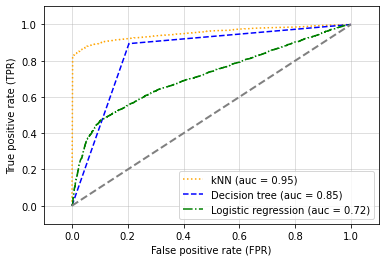

In [ ]:
######################################## Classifiers ########################################
# kNN Classifier

clf1 = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=21, weights='distance'))
      ])


# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy',
                              min_samples_leaf=1,
                              random_state=42)

# Logistic Regression Classifier
clf3 = LogisticRegression(penalty='l1',
                          C=10,
                          random_state=42,
                          solver='liblinear')


# Label the classifiers
clf_labels = ['kNN', 'Decision tree', 'Logistic regression']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X_oversampled_1,
                             y=y_oversampled_1,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" # print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # colors for visualization
linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

# Profit Graph

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = 0; cost_FP = -1; cost_FN = -100; cost_TN = 0;
cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [ ]:
#Convert to standard confusion matrix
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))

    return np.array([[TP,FP],[FN,TN]])

In [ ]:
# calculate profit curve
def profit_curve(cb, predict_probas, labels):
    #predict_probas = round(predict_probas,4)
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]

    profit_list = []

    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [ ]:
# Plot the profit curves
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]

    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

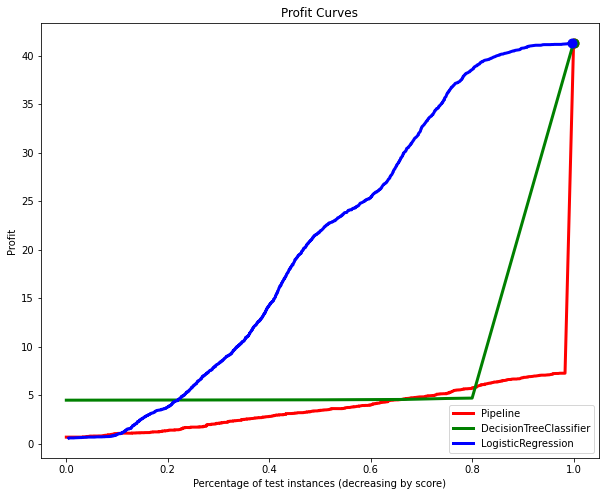

In [ ]:
models = [clf1, clf2, clf3]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train, X_test, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()